# 1. Distribuciones de las variables
## 1.1. Keywords

In [85]:
# Datos para histograma de keywrods en train
train_kw_histo = train['keyword'].value_counts()
train_kw_histo

fatalities               45
deluge                   42
armageddon               42
body%20bags              41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [86]:
# Las frecuencias fluctúan mayormente entre 30 y 40
train_kw_histo.describe()

count    221.000000
mean      34.171946
std        4.786091
min        9.000000
25%       33.000000
50%       35.000000
75%       37.000000
max       45.000000
Name: keyword, dtype: float64

In [88]:
# Datos para histograma de keywrods en test
test_kw_histo = test['keyword'].value_counts()
test_kw_histo

deluged          23
rubble           22
demolished       22
annihilation     21
obliteration     21
                 ..
threat            5
forest%20fire     5
fatalities        5
inundation        4
epicentre         1
Name: keyword, Length: 221, dtype: int64

In [89]:
# Las frecuencias fluctúan mayormente entre 10 y 20
test_kw_histo.describe()

count    221.000000
mean      14.647059
std        3.452582
min        1.000000
25%       13.000000
50%       15.000000
75%       17.000000
max       23.000000
Name: keyword, dtype: float64

## Figura 1. Distribución de keywords en ambos sets de datos

In [174]:
# Creamos dataframe con los las frecuencias de las keywords
kw_histos = pd.DataFrame({'train': train_kw_histo.sort_index(),
                          'test': test_kw_histo.sort_index(),
                         'train + test': train_kw_histo.sort_index() + test_kw_histo.sort_index()})
# Los ordenamos según train
kw_histos.sort_values(by='train', inplace=True) 
kw_histos

,train,test,train + test
radiation%20emergency,9,5,14
inundation,10,4,14
threat,11,5,16
epicentre,12,1,13
forest%20fire,19,5,24
...,...,...,...
sinking,41,9,50
body%20bags,41,9,50
armageddon,42,8,50
deluge,42,8,50


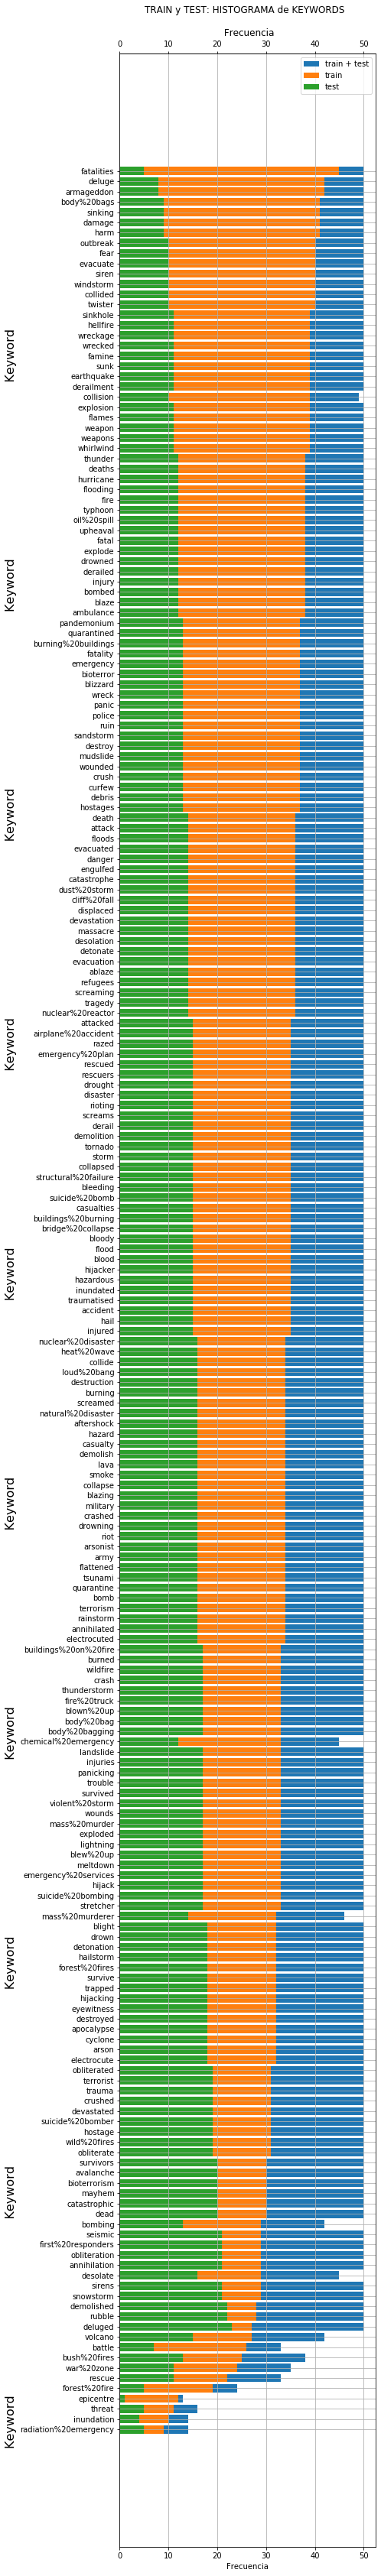

In [179]:
# Graficamos histogramas

fig = plt.figure(figsize=(6,60))

ax1 = fig.add_subplot()#, size=[6,50])
ax1.barh(kw_histos.index, kw_histos['train + test'])
ax1.barh(kw_histos.index, kw_histos['train'])
ax1.barh(kw_histos.index, kw_histos['test'])
ax1.grid()
ax1.set_title('TRAIN y TEST: HISTOGRAMA de KEYWORDS  \n\n Frecuencia')
ax1.secondary_xaxis('top')
ax1.set_xlabel('Frecuencia');
ax1.set_ylabel(('Keyword'+' '*45)*10, fontsize=16);
ax1.legend(['train + test', 'train', 'test'])

En la Figura X tenemos un pantallazo general de las frecuencias de todas las keywords para ambos sets de datos, y la suma de ocurrencias en train y test (son histogramas separados superpuestos, no es un stack). En general su frecuencia se encuentra distribuida de manera bastante uniforme entre 30-40 ocurrencias en train y 10-20 en test. Sin embargo, es muy llamativa la correlación que existe entre las frecuencias de cada keyword en ambos sets: al ordenar las keywords según su frecuencia en train de mayor a menor, como en la Figura X, notamos que, a mayor frecuencia de una keyword en train, menor frecuencia en test, de manera que se compensan en la suma train + test hasta llegar a 50, salvo excepciones, sobre todo entre los términos menos frecuentes en ambos sets. Uno podría sospechar que, para armar el set de datos, se tomaron tweets que representaran uniformemente cada keyword, salvo casos en los que se muestrearon pocos tweets, y luego se dividió el set en train y test de manera de lograr las diferencias de representación que se evidencián en la Figura X.

# --------
# MUY DUDOSO
Comparando los 10 términos con mayor y menor frecuencia, parece haber cierta tendencia a que los primeros sean más genéricos, es decir que podrían asociarse a una variedad de tipos de evento; mientras que los segundos suelen referir más específicamente a cierto tipo de evento. En la Tabla X presentamos una clasificación preliminar de estos términos (E = específico, G = genérico, D = dudoso). Haría falta un análisis estadístico más profundo y abarcativo para confirmar si existe esta tendencia.

In [125]:
pd.DataFrame({('Train','Kewyords Más Frecuentes'): train_kw_histo.index[:10],
              ('Train','KMF tipo de término'): ['G','E','G','G','E','D','G','E','E','G'],
              ('Train','Kewyords menos Frecuentes'): train_kw_histo.index[-10:],
              ('Train','KmF tipo de término'): ['E','G (enfermedad, guerra, fuego)','E','D (metafórico?)','G','E','E','G','E','E'],
              ('Test','Kewyords Más Frecuentes'): test_kw_histo.index[:10],
              ('Test','KMF tipo de término'): ['E','G','G','G','G','G','E','E','G','E'],
              ('Test','Kewyords menos Frecuentes'): test_kw_histo.index[-10:],
              ('Test','KmF tipo de término'): ['G','E','G','G','E','G','E','G','E','E']})

Train                                                \
  Kewyords Más Frecuentes KMF tipo de término Kewyords menos Frecuentes   
0              fatalities                   G                   volcano   
1                  deluge                   E                    battle   
2              armageddon                   G              bush%20fires   
3             body%20bags                   G                war%20zone   
4                  damage                   E                    rescue   
5                 sinking                   D             forest%20fire   
6                    harm                   G                 epicentre   
7                 twister                   E                    threat   
8               windstorm                   E                inundation   
9                collided                   G     radiation%20emergency   

                                                    Test                      \
             KmF tipo de término Kewyords Más Frecuentes KMF tipo de término   
0                              E                 deluged                   E   
1  G (enfermedad, guerra, fuego)                  rubble                   G   
2                              E              demolished                   G   
3                D (metafórico?)            annihilation                   G   
4                              G            obliteration                   G   
5                              E      first%20responders                   G   
6                              E                 seismic                   E   
7                              G               snowstorm                   E   
8                              E                  sirens                   G   
9                              E               avalanche                   E   

                                                 
  Kewyords menos Frecuentes KmF tipo de término  
0                      harm                   G  
1                    deluge                   E  
2                armageddon                   G  
3                    battle                   G  
4     radiation%20emergency                   E  
5                    threat                   G  
6             forest%20fire                   E  
7                fatalities                   G  
8                inundation                   E  
9                 epicentre                   E

# ------------
#  
# ------------
# MOSTRAMOS ESTO COMO SINTESIS DE LO DE ARRIBA?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e9baea8d0>,
      dtype=object)

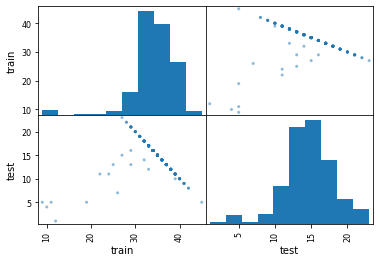

In [161]:
#fig = plt.figure()

#ax1 = fig.add_subplot()
pd.plotting.scatter_matrix(kw_histos)#x='train', y='test')#, title='fig_train_all Histograma', legend=True, xlim=(0, 160), figsize=(6,6))
#fig_train_all_ax1.set_xlabel('largo')